# 1 - Python examples

In [ ]:
!pip install unifiedbooster

## 1 - 1 regression

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



 ----- Running: California Housing ----- 


 ---------- Initialize the unified regr (example with XGBoost)
Time taken: 1.3590683937072754 seconds
Coverage rate: 0.9486


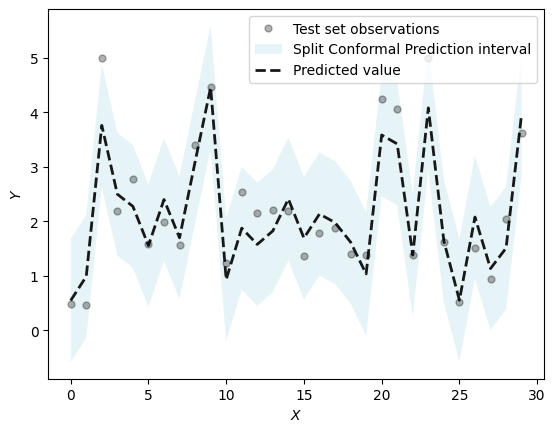


 ---------- Initialize the unified regr (example with LightGBM)
Time taken: 12.546200037002563 seconds
Coverage rate: 0.9998


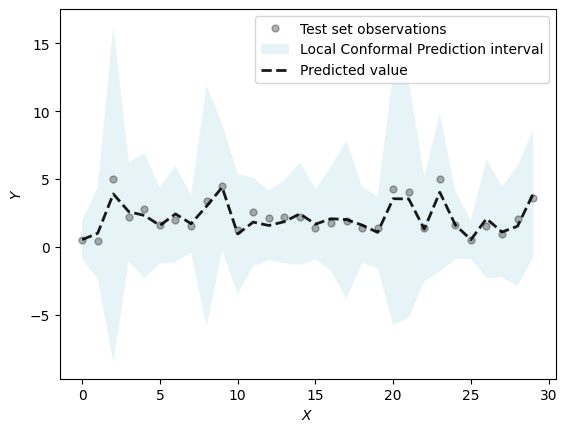


 ----- Running: Diabetes ----- 


 ---------- Initialize the unified regr (example with XGBoost)
Time taken: 0.09921503067016602 seconds
Coverage rate: 0.9438


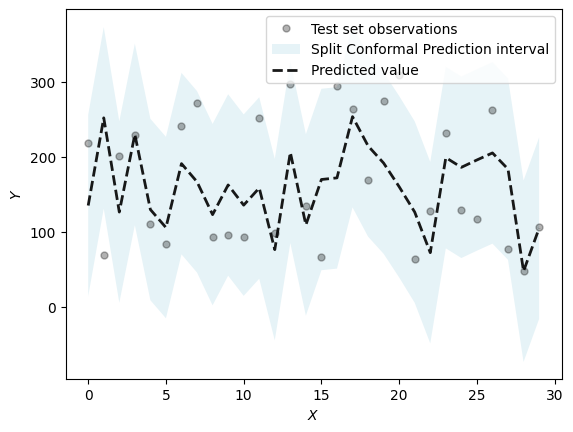


 ---------- Initialize the unified regr (example with LightGBM)
Time taken: 0.20723915100097656 seconds
Coverage rate: 1.0000


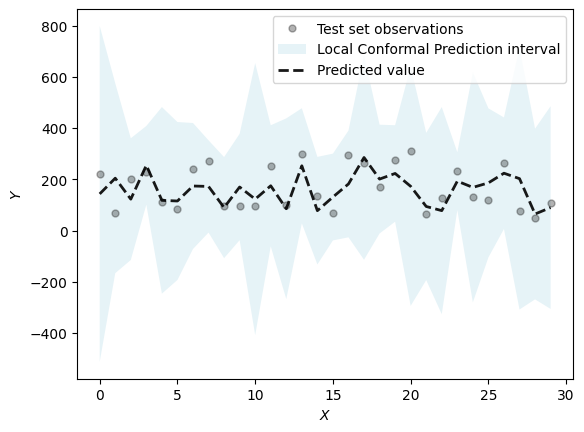

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import unifiedbooster as ub
import warnings
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from time import time


load_datasets = [fetch_california_housing(), load_diabetes()]
dataset_names = ["California Housing", "Diabetes"]

warnings.filterwarnings('ignore')

split_color = 'green'
split_color2 = 'orange'
local_color = 'gray'

def plot_func(x,
              y,
              y_u=None,
              y_l=None,
              pred=None,
              shade_color="lightblue",
              method_name="",
              title=""):

    fig = plt.figure()

    plt.plot(x, y, 'k.', alpha=.3, markersize=10,
             fillstyle='full', label=u'Test set observations')

    if (y_u is not None) and (y_l is not None):
        plt.fill(np.concatenate([x, x[::-1]]),
                 np.concatenate([y_u, y_l[::-1]]),
                 alpha=.3, fc=shade_color, ec='None',
                 label = method_name + ' Prediction interval')

    if pred is not None:
        plt.plot(x, pred, 'k--', lw=2, alpha=0.9,
                 label=u'Predicted value')

    #plt.ylim([-2.5, 7])
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.legend(loc='upper right')
    plt.title(title)

    plt.show()

for i, dataset in enumerate(load_datasets):

    print(f"\n ----- Running: {dataset_names[i]} ----- \n")
    X, y = dataset.data, dataset.target

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize the unified regr (example with XGBoost)
    print("\n ---------- Initialize the unified regr (example with XGBoost)")
    regr1 = ub.GBDTRegressor(model_type="xgboost",
                            level=95,
                            pi_method="splitconformal")

    # Fit the model
    start = time()
    regr1.fit(X_train, y_train)
    print(f"Time taken: {time() - start} seconds")
    # Predict with the model
    y_pred1 = regr1.predict(X_test)
    # Coverage error
    coverage_error = (y_test >= y_pred1.lower) & (y_test <= y_pred1.upper)
    print(f"Coverage rate: {coverage_error.mean():.4f}")
    #x,
    #y,
    #y_u=None,
    #y_l=None,
    #pred=None,
    plot_func(range(len(y_test))[0:30], y_test[0:30],
              y_pred1.upper[0:30], y_pred1.lower[0:30],
              y_pred1.mean[0:30], method_name="Split Conformal")

    print("\n ---------- Initialize the unified regr (example with LightGBM)")
    regr2 = ub.GBDTRegressor(model_type="lightgbm",
                            level=95,
                            pi_method="localconformal")
    # Fit the model
    start = time()
    regr2.fit(X_train, y_train)
    print(f"Time taken: {time() - start} seconds")
    # Predict with the model
    y_pred2 = regr2.predict(X_test)
    # Coverage error
    coverage_error = (y_test >= y_pred2.lower) & (y_test <= y_pred2.upper)
    print(f"Coverage rate: {coverage_error.mean():.4f}")
    #x,
    #y,
    #y_u=None,
    #y_l=None,
    #pred=None,
    plot_func(range(len(y_test))[0:30], y_test[0:30],
              y_pred2.upper[0:30], y_pred2.lower[0:30],
              y_pred2.mean[0:30], method_name="Local Conformal")

## 1 - 2 - classification

In [3]:
import numpy as np
import os
import unifiedbooster as ub
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from time import time


load_datasets = [load_iris(), load_breast_cancer(), load_wine()]
dataset_names = ["Iris", "Breast Cancer", "Wine"]

for i, dataset in enumerate(load_datasets):

    print(f"\n ----- Running: {dataset_names[i]} ----- \n")
    X, y = dataset.data, dataset.target

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize the unified clf (example with XGBoost)
    print("\n ---------- Initialize the unified clf (example with XGBoost)")
    clf1 = ub.GBDTClassifier(model_type="xgboost",
                            level=95,
                            pi_method="tcp")

    # Fit the model
    start = time()
    clf1.fit(X_train, y_train)
    print(f"Time taken: {time() - start} seconds")
    # Predict with the model
    y_pred1 = clf1.predict(X_test)
    print(y_test)
    print(y_pred1.argmax(axis=1))
    # Calculate accuracy
    accuracy = (y_test == y_pred1.argmax(axis=1)).mean()
    print(f"\nAccuracy: {accuracy:.4f}")

    print("\n ---------- Initialize the unified clf (example with LightGBM)")
    clf2 = ub.GBDTClassifier(model_type="lightgbm",
                            level=95,
                            pi_method="icp")
    # Fit the model
    start = time()
    clf2.fit(X_train, y_train)
    print(f"Time taken: {time() - start} seconds")
    # Predict with the model
    y_pred2 = clf2.predict(X_test)
    print(y_pred2)

    # Calculate accuracy
    print(y_test)
    print(y_pred2.argmax(axis=1))
    accuracy = (y_test == y_pred2.argmax(axis=1)).mean()
    print(f"\nAccuracy: {accuracy:.4f}")


 ----- Running: Iris ----- 


 ---------- Initialize the unified clf (example with XGBoost)
Time taken: 0.00011730194091796875 seconds
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Accuracy: 1.0000

 ---------- Initialize the unified clf (example with LightGBM)
Time taken: 0.02070021629333496 seconds
[[False  True  True]
 [ True False False]
 [False False  True]
 [False  True False]
 [False  True  True]
 [ True False False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [ True False False]
 [ True F

# 2 - R examples

In [4]:
%load_ext rpy2.ipython

In [ ]:
%%R

utils::install.packages("reticulate")
library("reticulate")
unifiedbooster <- import("unifiedbooster")

In [6]:
%%R

print(head(iris))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [7]:
%%R

X <- as.matrix(iris[,1:4])
y <- as.integer(iris$Species) - 1L

n <- nrow(X)
p <- ncol(X)

set.seed(123)
index_train <- sample(1:n, size=floor(0.8*n))

X_train <- X[index_train, ]
X_test <- X[-index_train, ]
y_train <- y[index_train]
y_test <- y[-index_train]

In [8]:
%%R

res <- unifiedbooster$cross_val_optim(X_train=X_train,
                          y_train=y_train,
                          X_test=X_test,
                          y_test=y_test,
                          model_type="lightgbm",
                          type_fit="classification",
                          scoring="accuracy",
                          cv=5L, # numbers of folds in cross-validation
                          verbose=1L,
                          seed=123L)
print(res)


 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 43s 226ms/step
result(best_params={'learning_rate': 0.00897182635344977, 'max_depth': 1, 'rowsample': 0.51275634765625, 'colsample': 0.69024658203125, 'n_estimators': 942, 'model_type': 'lightgbm'}, best_score=-0.9583333333333334, test_accuracy=0.9666666666666667)


In [9]:
%%R

(list_params <- c(res$best_params, list(level = 95L, pi_method="tcp")))

$learning_rate
[1] 0.008971826

$max_depth
[1] 1

$rowsample
[1] 0.5127563

$colsample
[1] 0.6902466

$n_estimators
[1] 942

$model_type
[1] "lightgbm"

$level
[1] 95

$pi_method
[1] "tcp"



In [10]:
%%R

# Initialize the unified clf
clf = do.call(unifiedbooster$GBDTClassifier,
              list_params)

print(clf)

# Fit the model
clf$fit(X_train, y_train)

# Predict on the test set
y_pred = clf$predict(X_test)

# Prediction set
print(y_pred)

GBDTClassifier(colsample=0.69024658203125, learning_rate=0.00897182635344977,
               level=95, max_depth=1, model_type='lightgbm', n_estimators=942,
               pi_method='tcp', rowsample=0.51275634765625)
       [,1]  [,2]  [,3]
 [1,]  TRUE FALSE FALSE
 [2,]  TRUE FALSE FALSE
 [3,]  TRUE FALSE FALSE
 [4,]  TRUE FALSE FALSE
 [5,]  TRUE FALSE FALSE
 [6,]  TRUE FALSE FALSE
 [7,]  TRUE FALSE FALSE
 [8,]  TRUE FALSE FALSE
 [9,]  TRUE FALSE FALSE
[10,]  TRUE FALSE FALSE
[11,] FALSE  TRUE FALSE
[12,] FALSE  TRUE FALSE
[13,] FALSE  TRUE FALSE
[14,] FALSE  TRUE FALSE
[15,] FALSE  TRUE FALSE
[16,] FALSE  TRUE FALSE
[17,] FALSE  TRUE FALSE
[18,] FALSE  TRUE FALSE
[19,] FALSE  TRUE FALSE
[20,] FALSE  TRUE FALSE
[21,] FALSE  TRUE FALSE
[22,] FALSE  TRUE FALSE
[23,] FALSE FALSE  TRUE
[24,] FALSE  TRUE FALSE
[25,] FALSE  TRUE FALSE
[26,] FALSE FALSE  TRUE
[27,] FALSE FALSE  TRUE
[28,] FALSE FALSE  TRUE
[29,] FALSE FALSE  TRUE
[30,] FALSE FALSE  TRUE


In [11]:
%%R

print(y_test)
print(apply(y_pred, 1, which.max) - 1)

 [1] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 [1] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2


In [12]:
%%R

# Calculate accuracy
(accuracy <- mean(y_test == (apply(y_pred, 1, which.max) - 1)))

[1] 0.9666667
